In [3]:
import os
import viz_functions
import charts_function_list

In [4]:
base, data, outputs = charts_function_list.folder_setup()


In [28]:
os.chdir(data)
sa = pd.read_csv('IG South America.csv')
sa = sa.sort_values(by='Hashtag').reset_index(drop=True)
sa['Hashtag_in_M'] = sa['Hashtag']/1000000
sa['Country_hash'] = sa['Country'].apply(lambda x: "#"+str.lower(str.replace(x,' ','')))

In [135]:
def sa_bar(labels,rotation=90):
    bars = charts_function_list.chart_maker(title = 'Hashtag Count of South American Countries \n(as of 2/25/2019)',title_size=22)
    fig = bars.initial_fig_axis()
    fig.subplots_adjust(top=.85)
    ax = fig.add_subplot(111)
    ax.bar(list(sa.index),sa['Hashtag_in_M'].values,color='#7DAEAB',edgecolor='#969C8E',zorder=2)

    bars.tick_params_(ax=ax,pad=10)

    xticks = ax.set_xticks(np.arange(0,13,1))
    ax.set_xlim(-.5,12.5)
    ax.set_ylim(0,50)
    xtick_labels = ax.set_xticklabels(labels,rotation=rotation)
    ax.set_ylabel('Hashtags (in Millions)',fontsize=14,alpha=.7)


    #ax.set_yticks(mold.index)
    #ytick_labels = ax.set_yticklabels(mold['Food'],ha='right',va='center')
    ax.grid(alpha=.2,zorder=1,xdata=[-.1,12.1])
    for i,hash_tag, in enumerate(sa['Hashtag_in_M']):
         ax.text(i,hash_tag+.01,"{:,.1f}M".format(hash_tag),fontsize=14,ha='center',va='bottom',color='#56463C')
    ax.text(1.01,.4,'Source: Instagram | igotcharts, 2018',transform=ax.transAxes,va='top',alpha=.7,rotation=90)


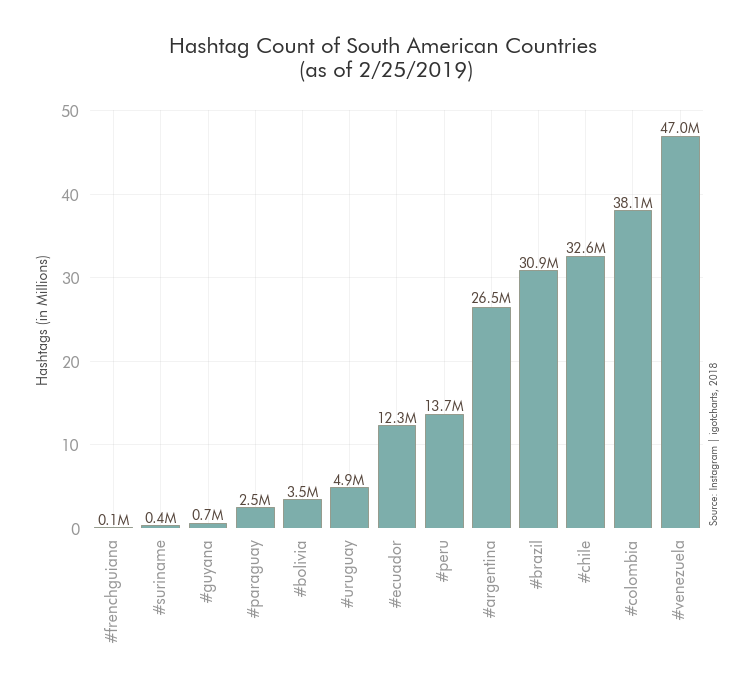

In [136]:
sa_bar(sa['Country_hash'])
os.chdir(outputs)
charts_function_list.chart_save('SA_hash')